<a href="https://colab.research.google.com/github/JhoannaR/DEV002-card-validation/blob/main/ProyectoDietas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## ***Caso: Dietas alrededor del mundo***🌎🥦



***Autora***: Jhoanna Rosa Mera Dávila



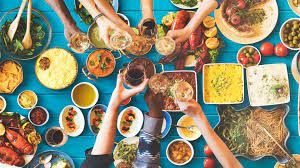

>



Una dieta es el conjunto de alimentos que consumimos de forma regular, constituyendo nuestro hábito o régimen alimenticio y formando parte de nuestro estilo de vida. 

Pero las dietas forman parte de nuestra vida. Y es que no solo hacen referencia a esas estrategias extrañas para perder peso rápidamente o para protegernos de enfermedades de forma mágica. Todos aquellos hábitos alimenticios a través de los cuales hacemos que un grupo de alimentos consumidos de forma regular determinen nuestro estilo de vida, es una dieta.

Pero, ¿sabemos realmente cuántas dietas distintas existen? En un mundo tan grande como es el de la nutrición humana, hay espacio para todo tipo de régimenes alimenticios, algunos más saludables y otros menos. Dieta mediterránea, detox, vegetariana, vegana, hipocalórica, hipercalórica, keto… Existen cientos de dietas diferentes y a continuación se muetra la data de un estudio realizado en el 16 de octubre del 2016 para las cuales se tiene el tipo de dieta, receta, tipo de cocina, proteínas, carbohidratos, grasa y el día y la hora en el que se consumieron dichos alimentos:

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')




Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importando la data

In [3]:
df= pd.read_csv("/content/gdrive/MyDrive/archive/All_Diets.csv")

In [4]:
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


Mostrando los 5 primeros registros

In [5]:
df.sample(5)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
129,paleo,Moroccan Braised Chicken and Kale,middle eastern,283.65,89.99,306.29,2022-10-16,17:21:18
5652,mediterranean,Mediterranean Bento Box,mediterranean,71.14,325.72,101.73,2022-10-16,16:51:05
2734,vegan,Vegan “Egg” Mayo,american,38.26,12.77,49.90,2022-10-16,20:13:13
4417,mediterranean,Mediterranean Lamb Chops,mediterranean,134.07,41.94,245.28,2022-10-16,16:43:47
5549,mediterranean,Mediterranean Pasta,mediterranean,51.10,214.62,79.52,2022-10-16,16:50:25


Resumen de todas las columnas , tipo de datos y numeros de valores perdidos.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


Cambiamos los nombres de la Columna

In [7]:
df.columns=["Tipo de dieta","Nombre de la receta","Tipo de cocina","Proteínas(g)","Carbohidratos(g)","Grasa","día","Hora"]

In [8]:
print(df)

     Tipo de dieta                                Nombre de la receta  \
0            paleo                    Bone Broth From 'Nom Nom Paleo'   
1            paleo  Paleo Effect Asian-Glazed Pork Sides, A Sweet ...   
2            paleo                                  Paleo Pumpkin Pie   
3            paleo                       Strawberry Guacamole recipes   
4            paleo  Asian Cauliflower Fried "Rice" From 'Nom Nom P...   
...            ...                                                ...   
7801          dash  Brown Butter-Sunchoke Soup With Brussels Sprou...   
7802          dash                                Make-Your-Own-Salad   
7803          dash                            Luis Buñuel Dry Martini   
7804          dash               Cornflake Semi-Fried Chicken Tenders   
7805          dash                         Emeril's Classic Manhattan   

        Tipo de cocina  Proteínas(g)  Carbohidratos(g)   Grasa         día  \
0             american          5.22         

In [9]:
df.head()

,Tipo de dieta,Nombre de la receta,Tipo de cocina,Proteínas(g),Carbohidratos(g),Grasa,día,Hora
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


Eliminamos todas las filas que contiene valores perdidos

In [10]:
df=df.dropna(axis=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tipo de dieta        7806 non-null   object 
 1   Nombre de la receta  7806 non-null   object 
 2   Tipo de cocina       7806 non-null   object 
 3   Proteínas(g)         7806 non-null   float64
 4   Carbohidratos(g)     7806 non-null   float64
 5   Grasa                7806 non-null   float64
 6   día                  7806 non-null   object 
 7   Hora                 7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 548.9+ KB


**Graficos Simples**

In [18]:
import seaborn as sns

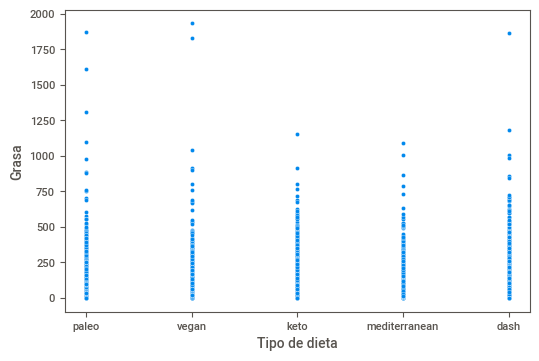

In [32]:
sns.scatterplot(data = df, x = "Tipo de dieta", y = "Grasa")

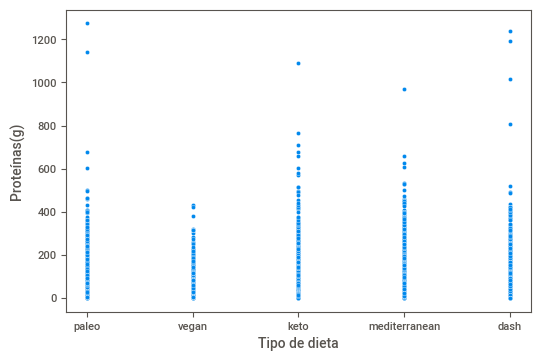

In [35]:
sns.scatterplot(data = df, x = "Tipo de dieta", y = "Proteínas(g)")

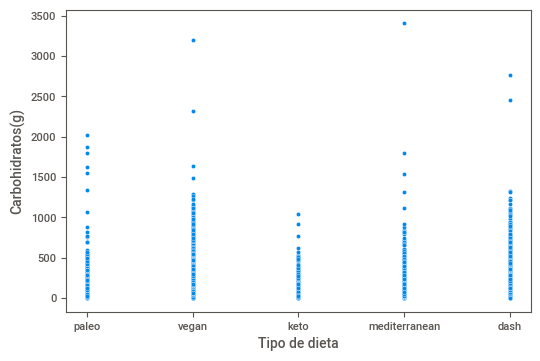

In [36]:
sns.scatterplot(data = df, x = "Tipo de dieta", y = "Carbohidratos(g)")

In [16]:
!pip install sweetviz
#!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 16.2 MB/s 


In [17]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Utilizando la librería Sweetviz:
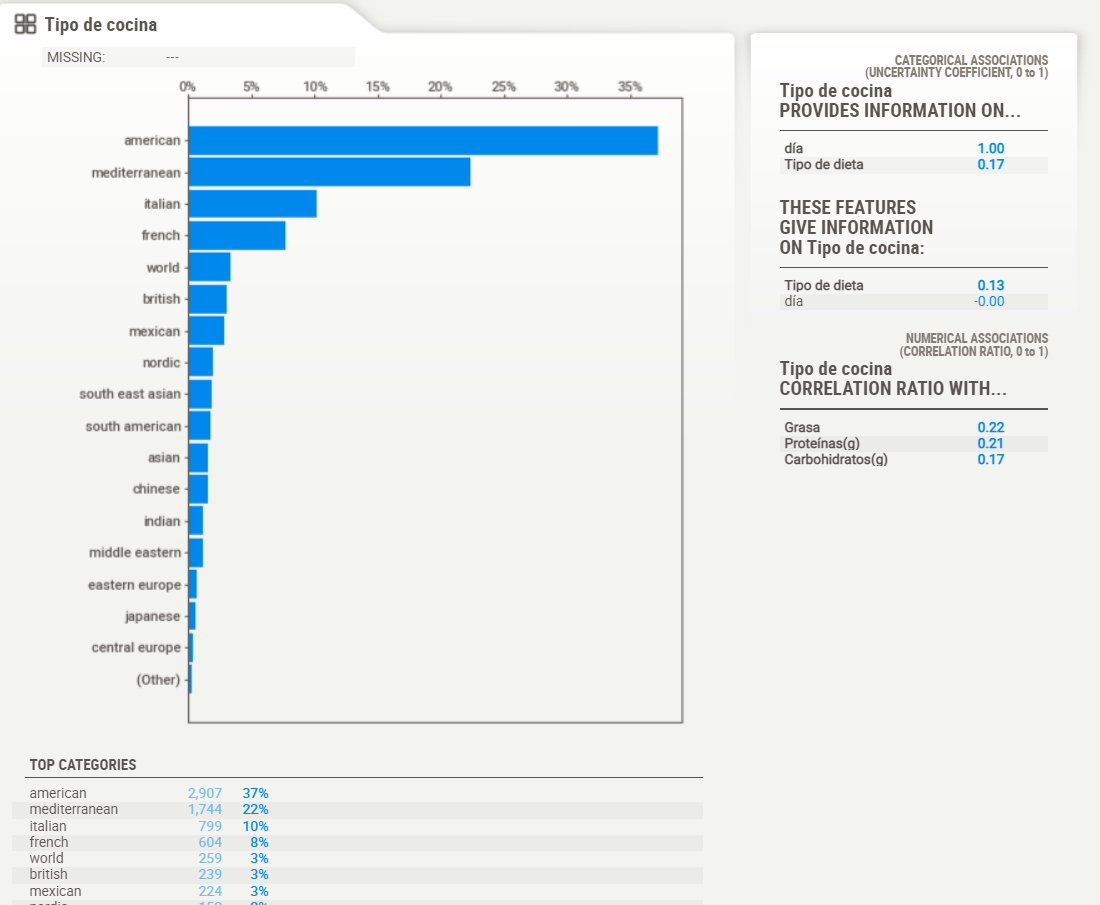

Distribución de las comidas según tipo de cocina y su correlación con su contenido en grasas, proteínas y carbohidratos. Podemos observar que la cocina american contiene el 37% de las comidas evaluadas en este estudio y junto a los 22% de cocina mediterranea suman mas del 50% de los datos del estudio.

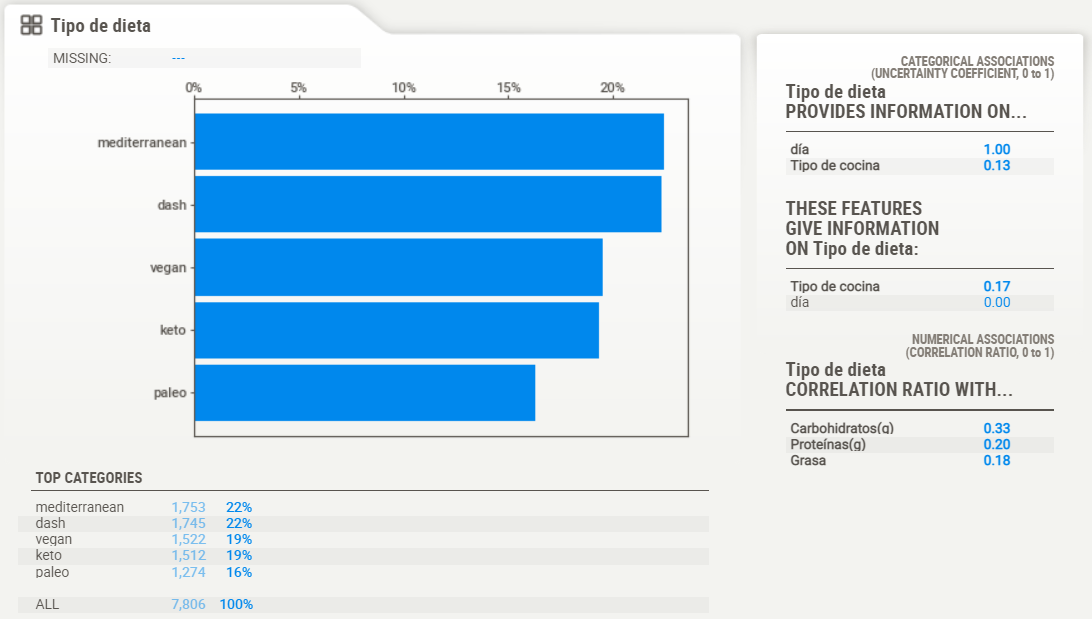

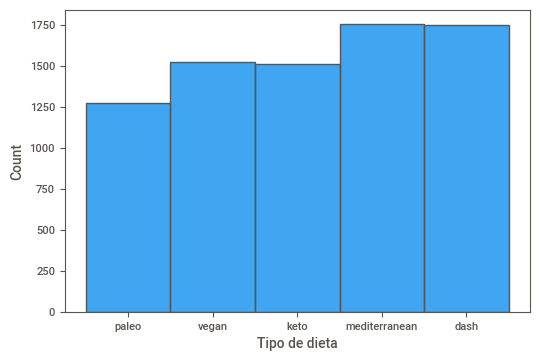

In [38]:
sns.histplot(data = df, x= 'Tipo de dieta')


Distribución de las comidas según tipo de dieta y su correlación con su contenido en grasas, proteínas y carbohidratos.

# Graficos multivariable

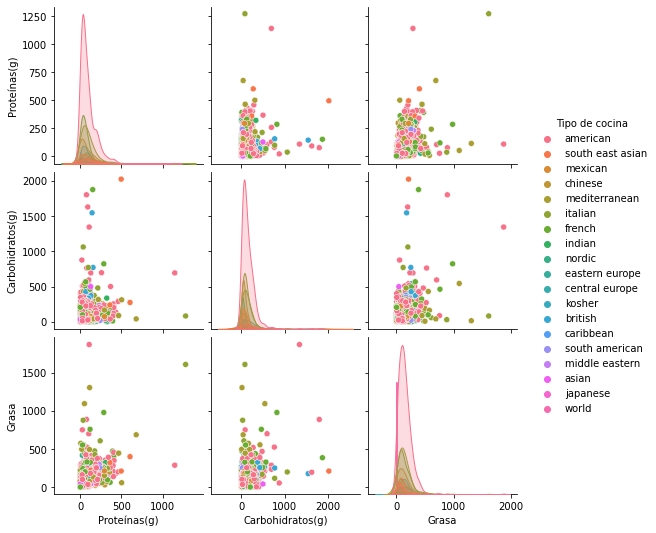

In [13]:
sns.pairplot(data=df[(df['Tipo de dieta']=='paleo')],hue="Tipo de cocina");

Con respecto al grafico anterior, podemos concluir que el tipo de cocina con mayor contenido de grasa, carbohidratos y proteínas es la cocina americana seguida por una gran diferencia de la cocina mediterranea y china.